# Instalações

In [ ]:
!pip install edgeimpulse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: pydantic
    Found existing inst

# Modelo ML

In [ ]:
# Imporanto as bibliotecas necessárias

import torch
from torch.utils.data import Dataset, random_split, DataLoader, TensorDataset
import torchvision
from torchvision.datasets.utils import download_url
import torch.nn as nn
import torch.nn.functional as F
import os
import librosa
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import matplotlib
import csv
from PIL import Image
from sklearn.metrics import f1_score
import IPython.display as ipd
import random
import edgeimpulse as ei
ei.API_KEY = 'ei_5a6807da0b03f3b8482622b4cc13e56848d65595c3893233a66918d4642f4256'

In [ ]:
import gdown

# ID do arquivo no Google Drive
file_id = '1E3srILBRypmlSHo5I4diBk75pLwl4qeQ'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'spoken_digit_melimages.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1E3srILBRypmlSHo5I4diBk75pLwl4qeQ
From (redirected): https://drive.google.com/uc?id=1E3srILBRypmlSHo5I4diBk75pLwl4qeQ&confirm=t&uuid=51a29c65-9d8e-4d92-ba7f-e2688bc14a04
To: /content/spoken_digit_melimages.zip
100%|██████████| 67.2M/67.2M [00:00<00:00, 144MB/s]


'spoken_digit_melimages.zip'

In [ ]:
!unzip -qo spoken_digit_melimages.zip

In [ ]:
digit = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

Label:  9 

Sampling rate:  22050 



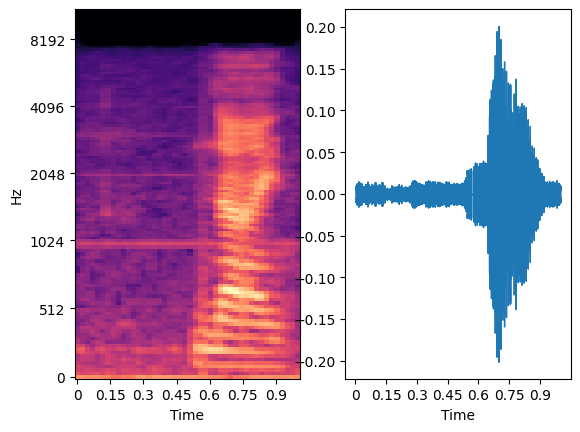

In [ ]:
# Random sample selection
digit_audio_sample = ['dataset_sample_0.wav', 'dataset_sample_1.wav', 'dataset_sample_2.wav', 'dataset_sample_3.wav', 'dataset_sample_4.wav', 'dataset_sample_5.wav', 'dataset_sample_6.wav', 'dataset_sample_7.wav', 'dataset_sample_8.wav', 'dataset_sample_9.wav']
i = random.randint(0, 9)

# Selecting the sample by label
#i = 4    # Label = 4

data, sr = librosa.load('melimages/'+digit_audio_sample[i])

fig = plt.figure()
# Two subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

print("Label: ", i, '\n')
print("Sampling rate: ", sr, "\n")

# mel spectogram
S = librosa.feature.melspectrogram(y=data, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax = ax1)
# waveshow
librosa.display.waveshow(np.array(data), sr=sr, ax = ax2)

ipd.Audio(data = data, rate = sr)

In [ ]:
# Spoken_digit.csv

spokendigit = pd.read_csv('https://drive.google.com/uc?id=1GLU3T1VmAWEIrjPjZEF6KeOF_GiqEvgu')
spokendigit

,File,Label
0,eight/e32ff49d_nohash_0.wav,eight
1,five/840eab5a_nohash_0.wav,five
2,six/541e4079_nohash_0.wav,six
3,one/b9cccd01_nohash_0.wav,one
4,seven/28e47b1a_nohash_2.wav,seven
...,...,...
23661,four/d33df435_nohash_0.wav,four
23662,two/1365dd89_nohash_0.wav,two
23663,zero/471a0925_nohash_0.wav,zero
23664,two/11b1df78_nohash_1.wav,two


In [ ]:
spokendigit['Label'].value_counts()

,count
Label,
seven,2377
zero,2376
two,2373
four,2372
one,2370
six,2369
nine,2364
five,2357
three,2356


In [ ]:
class SpokenDigit(Dataset):
    def __init__(self, file = None, rootdir = None, transform = None):
        self.df = pd.read_csv(file)
        self.rootdir = rootdir    # root directory for the images
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        row = self.df.loc[i]
        fname, label = row['File'], row['Label']
        ik = self.rootdir+fname[:-4]+'.jpg'
        img = Image.open(ik)
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(digit.index(label))    # return image tensor and numeric label

    def getsr(self, i):
        row = self.df.loc[i]
        fname, label = row['File'], row['Label']
        _, sr = librosa.load(self.rootdir+fname)
        return sr

In [ ]:
meldset = SpokenDigit('https://drive.google.com/uc?id=1GLU3T1VmAWEIrjPjZEF6KeOF_GiqEvgu', 'melimages/', transforms.Compose([transforms.ToTensor()]))

In [ ]:
# train - val split of 85-15

size = len(meldset)
val_size = int(0.15 * size)
train_size = size - val_size

train_dset, val_dset = random_split(meldset, [train_size, val_size])

print("Number of samples in train set: ", train_size)
print("Number of samples in validation set: ", val_size)

Number of samples in train set:  20117
Number of samples in validation set:  3549


In [ ]:
train_dl = DataLoader(train_dset, 64, True, num_workers=6, pin_memory=True)
val_dl = DataLoader(val_dset, 64, num_workers=6, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
class SpokenDigitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),

            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim = 1)
        )

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch):
        inputs, labels = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, labels)    # cros entropy loss
        return loss

    def validation_step(self, batch):
        inputs, labels = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, labels)
        _, pred = torch.max(outputs, 1)
        accuracy = torch.tensor(torch.sum(pred==labels).item()/len(pred))    # calculate accuracy
        return [loss.detach(), accuracy.detach()]

In [ ]:
def evaluate(model, loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in loader]
    outputs = torch.tensor(outputs).T
    loss, accuracy = torch.mean(outputs, dim=1)
    return {"loss" : loss.item(), "accuracy" : accuracy.item()}

In [ ]:
def fit(model, train_loader, val_loader, epochs, lr, optimizer_function = torch.optim.Adam):
    history = []
    optimizer = optimizer_function(model.parameters(), lr)

    for epoch in range(epochs):
        print("Epoch ", epoch)
        #Train
        model.train()

        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        #Validate
        result = evaluate(model, val_loader)

        print(" Val_loss: ", result['loss'], " Accuracy: ", result['accuracy'])

        history.append(result)
    return history

In [ ]:
model = SpokenDigitModel()
history = []

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# evaluating on an untrained model
evaluate(model, val_dl)
from torchsummary import summary
import torch
import torchvision
from torch import nn
from torchvision import models
print(model)
count_parameters(model)

SpokenDigitModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

581994

In [ ]:
history.append(fit(model, train_dl, val_dl, 16, 0.001))

Epoch  0
 Val_loss:  2.045856475830078  Accuracy:  0.42134585976600647
Epoch  1
 Val_loss:  1.827890157699585  Accuracy:  0.6326296925544739
Epoch  2
 Val_loss:  1.702131986618042  Accuracy:  0.7580241560935974
Epoch  3
 Val_loss:  1.6754827499389648  Accuracy:  0.7862626910209656
Epoch  4
 Val_loss:  1.6989269256591797  Accuracy:  0.7612088322639465
Epoch  5
 Val_loss:  1.6686781644821167  Accuracy:  0.789553165435791
Epoch  6
 Val_loss:  1.5994654893875122  Accuracy:  0.8608759641647339
Epoch  7
 Val_loss:  1.5714547634124756  Accuracy:  0.8905095458030701
Epoch  8
 Val_loss:  1.5716031789779663  Accuracy:  0.8902305364608765
Epoch  9
 Val_loss:  1.5748013257980347  Accuracy:  0.8855448961257935
Epoch  10
 Val_loss:  1.552305817604065  Accuracy:  0.9087033867835999
Epoch  11
 Val_loss:  1.5533949136734009  Accuracy:  0.9061345458030701
Epoch  12
 Val_loss:  1.5917729139328003  Accuracy:  0.8684671521186829
Epoch  13
 Val_loss:  1.5423500537872314  Accuracy:  0.9170739054679871
Epoch 

In [ ]:
evaluate(model, val_dl)

{'loss': 1.5518245697021484, 'accuracy': 0.9084243774414062}

In [ ]:
import torch

# Salvar o modelo completo
torch.save(model, "my_model_torch.pth")

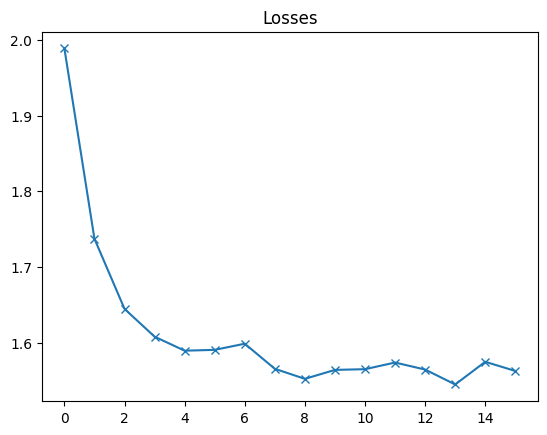

In [ ]:
plot(losses, 'Losses')

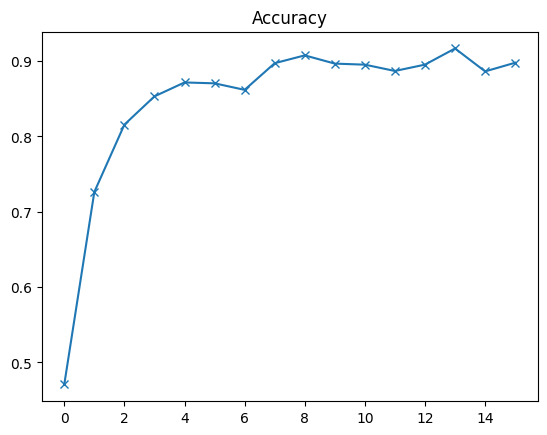

In [ ]:
plot(accuracies, 'Accuracy')

#QUANTIZAÇÕES TENSOFLOW

In [ ]:
!pip install onnx2tf
!pip install onnx
!pip install sng4onnx

In [ ]:
model = torch.load('my_model_torch.pth')

<ipython-input-6-14b352beafc8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('my_model_torch.pth')


FileNotFoundError: [Errno 2] No such file or directory: 'my_model_torch.pth'

In [ ]:
#CRIA MODELO ONNX

import torch
import onnx


# Supondo que model seja seu modelo treinado
input_tensor = torch.randn(64, 3, 54, 55)  # Exemplo de tensor de entrada

torch.onnx.export(
    model,
    input_tensor,
    "my_model.onnx",
    export_params=True,  # Exportar parâmetros do modelo
    opset_version=11,    # Certifique-se de usar uma versão compatível do opset
    do_constant_folding=True,  # Otimizações
    input_names=["input"],  # Nomes das entradas
    output_names=["output"],  # Nomes das saídas
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}}  # Eixos dinâmicos
)

# Carregar o modelo ONNX
onnx_model = onnx.load("my_model.onnx")

# Verificar o modelo
onnx.checker.check_model(onnx_model)

print("O modelo ONNX é válido.")

<ipython-input-27-93381bb9523b>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('my_model_torch.pth')


O modelo ONNX é válido.


In [ ]:
import onnx
from onnx2tf import convert

# Converter para TFLite
convert(
    input_onnx_file_path='my_model.onnx',
    output_folder_path='',
    not_use_onnxsim=True, # -nuo
    verbosity="info", # or "error"
    output_integer_quantized_tflite=True, # int8
)
print("Conversão para TFLite concluída!")


Automatic generation of each OP name started ========================================
Automatic generation of each OP name complete!

Model loaded ========================================================================

Model conversion started ============================================================
saved_model output started ==========================================================
Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 54, 55, 3), dtype=tf.float32, name='input')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139618975375152: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  139618973528688: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  139618973059024: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  139618973059552: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  139618974788144:

# MANDA MODELO PYTORCH SEM QUANTIZAÇÃO PARA ONNX E DEPOIS EDGE IMPULSE

In [ ]:
model = torch.load('my_model_torch.pth')

<ipython-input-7-14b352beafc8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('my_model_torch.pth')


In [ ]:
import torch

# Supondo que model seja seu modelo treinado
input_tensor = torch.randn(1, 3, 54, 55)  # Exemplo de tensor de entrada

torch.onnx.export(
    model,
    input_tensor,
    "my_model.onnx",
    )

In [ ]:
ei.model.deploy(model="my_model.onnx",
                model_input_type=ei.model.input_type.OtherInput(),
                model_output_type=ei.model.output_type.Classification(),
                output_directory=".")

In [ ]:
losses = []
accuracies = []

# gathering metrics across all epochs
for i in range(len(history)):
    for j in history[i]:
        losses.append(j['loss'])
        accuracies.append(j['accuracy'])

# function to plot metrics
def plot(var, title):
    plt.plot(var, '-x')
    plt.title(title)